# Preparación de datos con Pandas

Autores: Ismael Sagredo Olivenza y Fernando Carlos López Hernández

* POR PABLO GARCÍA FERNÁNDEZ Y YURIY CHABAN MARKEVYCH

## Pandas

Pandas es el acrónimo de (Python Data Analysis Library) es un código fuente open source con licencia BSD que proporciona estructuras de datos, herramientas de análisis en python, fáciles de usar y de alto rendimiento.

**Dataframe**

Es la estuctura fundamental de Pandas. Es una especie de tabla que permite cargar información proveniente de un fichero y poder manejarla a nuestro antojo. Soporta importación directa desde csv lo que es muy útil ya que es el formato más extendido de los diferentes datasets que están publicados en internet.
El dataframe puede tener en cada columna un tipo de datos diferentes.

Vamos a trabajar con Python para tener cierta soltura con el lenguaje antes realizar los laboratorios.
Para ello vamos a realizar el siguiente ejercicios que consisten en trabajar con el datase de películas de movielens dataset que se puede descargar aquí:
https://grouplens.org/datasets/movielens/

Lo primero que haremos será cargar el fichero movies_metadata.csv usando Pandas en un dataframe.

In [24]:
import pandas as pd
import numpy as np
movies = pd.read_csv('movies_metadata.csv', dtype={10: str})

El warning se produce porque hay algunos campos del dataset que son multicampo y no sabe de que tipo son. Vamos a establecer los tipos para que desaparezca el warning. Como nos indica que el campo que no conoce es el 10, establecemos el 10 como str.

In [25]:

movies = pd.read_csv('movies_metadata.csv',dtype={ 10 : 'str'})

Podemos visualizar el dataframe entero usando display. Pero en muchas ocasiones nos interesa mostrar solo una parte del dataframe para que podamos ver que pinta tiene el dataframe.


In [26]:
display(movies.head(n=4));
display(movies.tail(n=4));

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


Echamos un vistazo al dataframe, los principales campos que nos interesan son el id, el original_title, los géneros, pero también hay otros interesantes como el rating medio vote_ average.

Ahora cargamos el fichero de ratings ratings_small.csv

In [27]:
ratings = pd.read_csv('ratings_small.csv')

In [28]:
display(ratings.head(n=4));
display(ratings.tail(n=4));

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185


,userId,movieId,rating,timestamp
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724
100004,5243,8587,1.0,1141800434
100005,8659,8587,3.0,1134949641


En el fichero rating tenemos las valoraciones de los usuarios identificados con un id anónimo (userId) y el identificador de la palícula (movieId). De esta forma podemos relacionar ambos dataframes. Por ejemplo, si queremos buscar todas las votaciones de una película concreta podemos extraer el id de la película que queremos buscar y con ese id consultar los ratings. Buscamos por ejemplo la película "The Lation King"

In [29]:
lion = movies[movies["title"] == "The Lion King"]
display(lion)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
359,False,"{'id': 94032, 'name': 'The Lion King Collectio...",45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://movies.disney.com/the-lion-king,8587,tt0110357,en,The Lion King,A young lion cub named Simba can't wait to be ...,...,1994-06-23,788241776.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's greatest adventure is finding your plac...,The Lion King,False,8.0,5520.0


Pero buscar en un campo de texto de esta forma es complicado, ya que podemos estar buscando un texto y este no estar escrito exactamente igual que el almacenado (puedes poner una letra minúscula en alguna de las mayúsculas para comprobarlo). Una solución es buscar parcialmente. Pandas no lo permite hacer directamente, pero tenemos algunos trucos para conseguirlo, por ejemplo usando máscaras.

In [30]:
tested = 'lion king'
#Hacemos una subselección de los dos campos que nos interesan y los copiamos a otro dataframe
titles=movies[["original_title","id"]].copy();
# Nos creamos una máscara con el método applymap que nos indica que campos contienen una condición que establecemos mediante una lambda
mask = titles.applymap(lambda x:  tested.lower() in str(x).lower())
# Aplicamos la mascara para encontrar que campos nos interesan usando la función any
df1 = titles[mask.any(axis=1)]
#Any nos devuelve la fila o columna (dependiendo del axis) que al menos tenga un campo a true de la máscara. Axis 1 indica
# la columna en este caso. Si queremos devolver la fila, sería axis = 0
display(df1)

/tmp/ipykernel_7509/683699876.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = titles.applymap(lambda x:  tested.lower() in str(x).lower())


,original_title,id
359,The Lion King,8587
9115,The Lion King 2: Simba's Pride,9732
9353,The Lion King 1½,11430


Nos encuentra tres de las películas de de la saga de The Lion King. Ahora podemos identificar correctamente el criterio de búisqueda para seleccionar correctamente el que deseamos

In [31]:
lion = movies[movies["title"] == "The Lion King"]
display(lion)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
359,False,"{'id': 94032, 'name': 'The Lion King Collectio...",45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://movies.disney.com/the-lion-king,8587,tt0110357,en,The Lion King,A young lion cub named Simba can't wait to be ...,...,1994-06-23,788241776.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's greatest adventure is finding your plac...,The Lion King,False,8.0,5520.0


Identificada la entrada de la película que queremos buscar, ahora procedemos, usando el ID a buscar los ratings de dicha película. Para acceder al valor del id tenemos que usar la función loc que define una selección a traves de un indice, en nuestro caso el 0 que nos devolverá la fila del índice.

In [32]:
lionId = int(lion["id"].loc[lion.index[0]])
#lionId = movies[movies["title"] == "The Lion King"]["id"]
print(lionId)
ratingLion = ratings[ratings["movieId"] == lionId]
display(ratingLion)

8587


,userId,movieId,rating,timestamp
100004,5243,8587,1.0,1141800434
100005,8659,8587,3.0,1134949641


Ahora queremos calcular la media de las valoraciones de la película en el fichero de ratings. Para ello vamos a ejecutar la función mean()

In [33]:
print(ratingLion["rating"].mean())

2.0


Entre los campos vemos que hay un timestamp, vamos a convertirlo a date y le cambiamos el nombre a la columna

In [34]:
import datetime

ratings["timestamp"] = ratings["timestamp"].apply(lambda x:  datetime.datetime.fromtimestamp(x).isoformat())
ratings.rename(columns = {'timestamp':'datetime'}, inplace = True)
display(ratings)


,userId,movieId,rating,datetime
0,1,31,2.5,2009-12-14T03:52:24
1,1,1029,3.0,2009-12-14T03:52:59
2,1,1061,3.0,2009-12-14T03:53:02
3,1,1129,2.0,2009-12-14T03:53:05
4,1,1172,4.0,2009-12-14T03:53:25
...,...,...,...,...
100001,671,6365,4.0,2003-12-09T04:26:03
100002,671,6385,2.5,2003-12-09T15:21:03
100003,671,6565,3.5,2004-01-22T16:18:44
100004,5243,8587,1.0,2006-03-08T07:47:14


vamos a extraer el género de la película, lo primero que vemos es que los nombres estan con comillas simples, esto provoca un error en el parseo de json, asi que debemos primero limpiar la info usando replace()

In [35]:
genre = lion["genres"].loc[lion.index[0]];
genre = genre.replace("'", "\"")
import json
genreArray = json.loads(genre)
for g in genreArray:
    print(g["name"])

Family
Animation
Drama


Ahora vamos a aplicar una función que convierta los géneros en una cadena separada por comas para poder usarla en nuestras consultas más cómodamente. Para ello vamos a usar la función apply que nos permite aplicar una función a una fila o columna

In [36]:
def transform_genre(x):
    x = x.replace("'", "\"")
    xArr = json.loads(x)
    strOut = ""
    for g in xArr:
        strOut = strOut + g["name"] + ","
    strOut = strOut[0:-1]
    return strOut


movies["genres"] = movies["genres"].apply(transform_genre)


In [37]:
display(movies)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"Adventure,Fantasy,Family",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance,Comedy",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"Comedy,Drama,Romance",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"Drama,Family",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"Action,Drama,Thriller",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


Ahora podemos buscar todas las películas de animación y por ejemplo calcular su puntuación media usando una máscara.

In [38]:
tested = "Animation"
maskGenre = movies.applymap(lambda x:  tested.lower() in str(x).lower())
animation = movies[maskGenre.any(axis=1)]
display(animation.head())
print(animation["vote_average"].mean())

/tmp/ipykernel_7509/2701463179.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  maskGenre = movies.applymap(lambda x:  tested.lower() in str(x).lower())


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
12,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"Family,Animation,Adventure",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,...,1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0
47,False,"{'id': 136214, 'name': 'Pocahontas Collection'...",55000000,"Adventure,Animation,Drama,Family",NaN,10530,tt0114148,en,Pocahontas,History comes gloriously to life in Disney's e...,...,1995-06-14,346079773.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An American legend comes to life.,Pocahontas,False,6.7,1509.0
235,False,"{'id': 410261, 'name': 'A Goofy Movie Collecti...",0,"Romance,Animation,Family,Comedy,Adventure",NaN,15789,tt0113198,en,A Goofy Movie,"Though Goofy always means well, his amiable cl...",...,1995-04-07,35348597.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's the story of a father who couldn't be clo...,A Goofy Movie,False,6.7,404.0
240,False,NaN,0,"Fantasy,Animation,Science Fiction,Family",NaN,43475,tt0113234,en,Gumby: The Movie,The band is back together! Gumby reunites with...,...,1995-12-01,0.0,77.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The original green hero!,Gumby: The Movie,False,5.0,2.0


6.254214463840399


Ahora vamos a contar aquellas películas que tenían video y ver si son más que las que no lo tienen, para ello usamos groupby. Esta función agrupa por uno o varios campos, haciendo una especie de lista de colisiones para el resto de campos, de forma que podemos luego hacer preguntas sobre la lista.

In [39]:
numVideo = movies.groupby("video").count()
display(numVideo)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
video,,,,,,,,,,,,,,,,,,,,,
False,45367,4486,45367,45367,7750,45367,45350,45356,45367,44418,...,45367,45287,45367,45111,45367,45286,20387,45367,45367,45367
True,93,4,93,93,28,93,93,93,93,88,...,93,89,93,92,93,93,25,93,93,93


Como vemos, la función count se aplica a todos los campos de la lista de colisión. Pero podemos aplicarlo a un campo concreto, al que nos interese, para que sea más óptimo. Por ejemplo vamos a calcular el runtime medio de las películas de video y las que no.

In [40]:
revenueVideo = movies.groupby("video")["runtime"].mean()
print(revenueVideo[revenueVideo.index[0]])
print(revenueVideo[revenueVideo.index[1]])

94.14681563255083
85.0


Cargamos el fichero credits

In [41]:
credits = pd.read_csv('credits.csv')
display(credits.head())

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Y hacemos un merge entre movies y credits por el campo id. Si el campo id es int64 convertirlo a string

In [42]:
movies["id"] = movies["id"].astype(str)
credits["id"] = credits["id"].astype(str)
movie_credits = pd.merge(movies,credits,how='inner',on=('id'))
display(movie_credits)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"Adventure,Fantasy,Family",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"Romance,Comedy",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"Comedy,Drama,Romance",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,False,NaN,0,"Drama,Family",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
45534,False,NaN,0,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45535,False,NaN,0,"Action,Drama,Thriller",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45536,False,NaN,0,,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


Ahora podemos saber los actores de una película, pero tambien que películas ha hecho un actor.
## Ejercicio 01
Buscar todas las películas interpretadas por **Bruce Willis**. Pero nos vamos a encontrar nuevamente con problemas en el json. Hay dos estrategias posibles, limpiar el json o ir al grano. Limpiar el json será costoso y dará bastantes problemas os proponemos la segunda opción:
Hay que crear una función que convierta Json a array por espacios. La función anterior no nos vale porque este json tiene errores que hay que subsanar más allá de convertir comillas simples por dobles (por ejemplo algunos campos tiene comillas simples en el interior del campo), por lo que es mejor ir directamente a procesar los campos name: <nombre del actor> extraerlos y contruir una lista sin usar el parser de json.
    
NOTA: Esto es muy típico en los datasets, no todos los datos vienen limpios y gran parte del trabajo en IA en general y Machine Learning en particular es preprocesar los datos paraque nos sean útiles.


In [43]:
def transform_cast(x):
    listaActoresAux = str(x).split("'name': ")[1:]
    listaActores = []
    for a in listaActoresAux:
        listaActores.append(a.split(",", 1)[0])
    return listaActores

credits["cast"] = credits["cast"].apply(transform_cast)

actor = "Bruce Willis"
maskGenre = credits.applymap(lambda x:  actor.lower() in str(x).lower())
pelis = credits[maskGenre.any(axis=1)]

pelis_actor = pd.merge(movies,pelis,how='inner',on=('id'))
print(actor)
display(pelis_actor["original_title"])

/tmp/ipykernel_7509/1150125485.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  maskGenre = credits.applymap(lambda x:  actor.lower() in str(x).lower())


Bruce Willis


0                     Four Rooms
1                 Twelve Monkeys
2     Die Hard: With a Vengeance
3                  Nobody's Fool
4                   Pulp Fiction
                 ...            
87                Precious Cargo
88                     Marauders
89                         Split
90    Once Upon a Time in Venice
91                    First Kill
Name: original_title, Length: 92, dtype: object

## Uso de sklearn para calcular una regresión lineal

Sklearn es la libreria principal que vamos a utilizar para aplicar técnicas
de aprendizaje máquina. Pero despone de multitud de herramientas que son útiles
Por ejemplo dispone de regresión lineal.

Vamos a optener la ecuación lineal que minimiza el error cuadrático medio.
Esta ecuación constará de una variable dependiente y un conjunto de variables
independientes.

Para cada x se optendrá un error concreto en función de la distancia existente
entre el punto marcado por la recta y el valor real.

In [44]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#cargando el dataset de diabetes que incorpora sklearn.
diabetes = datasets.load_diabetes()
#usamos solo una caracteristica
diabetes_x = diabetes.data[:,np.newaxis,2]
#dividimos el dato ente entrenamiento y validación o test.
#esto es algo recurrente cuando hacemos aprendizaje máquina.

diabetes_x_train = diabetes_x[:-20] # Todos menos los 20 ultimos.

diabetes_x_test = diabetes_x[-20:] # desde el puesto 10 empezanod por le final hasta el final

# luego cogemos las clases para obtener los valores esperados.
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

#creamos la regresión lineal:
linearreg = linear_model.LinearRegression()
linearreg.fit(diabetes_x_train, diabetes_y_train)

#Comprobamos la capacidad de predicción
diabetes_y_pred = linearreg.predict(diabetes_x_test)
print("Mostramos los valores obtenidos por la regresión lineal")
print('Coeficientes: \n', linearreg.coef_)
print("MSE: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('R2: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred)) #coeficiente de regresión.


Mostramos los valores obtenidos por la regresión lineal
Coeficientes: 
 [938.23786125]
MSE: 2548.07
R2: 0.47


Ahora dibujamos una gráfica usando matplotlib.pyplot que muestre la matriz de puntos y al recta de regresión.

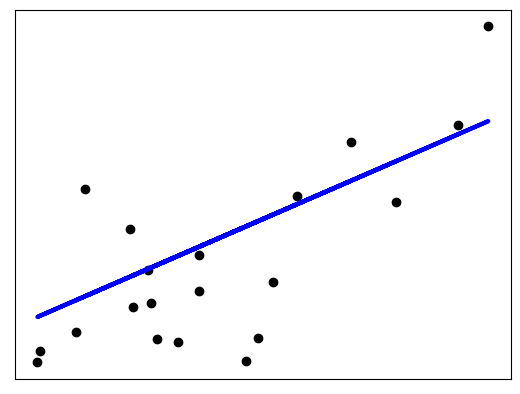

In [45]:

import matplotlib.pyplot as plt
plt.scatter(diabetes_x_test, diabetes_y_test,  color='black')
plt.plot(diabetes_x_test, diabetes_y_pred, color='blue', linewidth=3) #en linewidth le indicamos la linea en la gráfica.
plt.xticks(())
plt.yticks(())

plt.show()

# Ejercicio 02
Realiza otra recta de regresión del dataset "Boston" (Boston house prices) que tambien podeis encontrar en sklearn, pintando su gráfica.

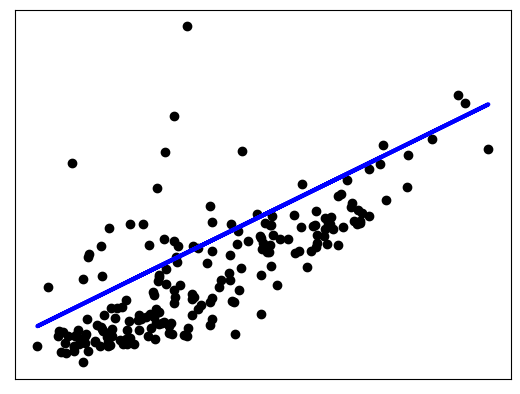

In [46]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn import linear_model

california = fetch_california_housing()

california_x = california.data[:,np.newaxis,0] # Característica -> MedInc
california_x_train = california_x[:-200]
california_x_test = california_x[-200:]
california_y_train = california.target[:-200]
california_y_test = california.target[-200:]

linearreg = linear_model.LinearRegression()
linearreg.fit(california_x_train, california_y_train)

california_y_pred = linearreg.predict(california_x_test)

plt.scatter(california_x_test, california_y_test,  color='black')
plt.plot(california_x_test, california_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

# Ejercicio 03
Basándote en datos aleatorios (los que quieras) crea un gráfico de tarta (pie chart) con Mapplotlib. La gráfica debe tener un título, etiquetas de cada clase, visible los porcentajes de cada clase y opcionalmente una de las clases resaltadas.

[34 33 34 35]


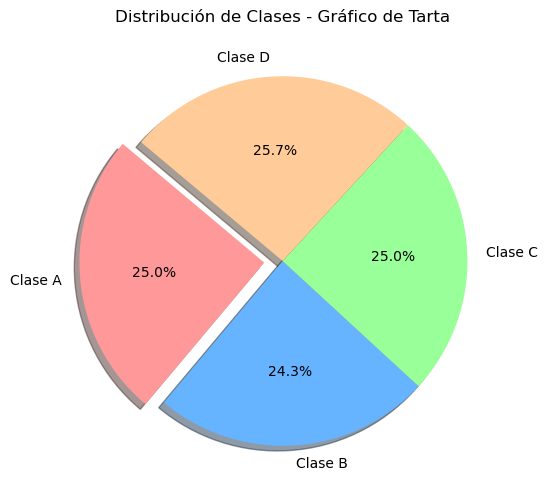

In [47]:
# Escribe aqui el ejercicio 3import matplotlib.pyplot as plt
import numpy as np

# Datos aleatorios
clases = ["Clase A", "Clase B", "Clase C", "Clase D"]
valores = np.random.randint(10, 50, size=4)  # Generamos valores aleatorios entre 10 y 50
print(valores)
# Colores y resaltar una clase (por ejemplo, la primera)
explode = (0.1, 0, 0, 0)  # Resaltamos solo la primera clase

# Crear la gráfica de tarta
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=clases, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"],
        startangle=140, explode=explode, shadow=True)

# Título de la gráfica
plt.title("Distribución de Clases - Gráfico de Tarta")

# Mostrar la gráfica
plt.show()
